In [ ]:
# Importing the required libraries
import string
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# NLP libraries
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

# Importing train_test_split
from sklearn.model_selection import train_test_split

# ML Algo
from sklearn.naive_bayes import MultinomialNB

# Validation Metrics
from sklearn.metrics import ConfusionMatrixDisplay, classification_report

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# Importing the data
data = pd.read_csv('/content/sms_spam.csv')
data.head()

,type,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
# data dimension
print(f"the data has {data.shape[0]} rows and {data.shape[1]} columns")

the data has 5574 rows and 2 columns


In [ ]:
# data distribution
round(data['type'].value_counts(normalize=True)*100, 1)

,proportion
type,
ham,86.6
spam,13.4


In [ ]:
# Statistical nature of the text columns
data.describe()

,type,text
count,5574,5574
unique,2,5160
top,ham,"Sorry, I'll call later"
freq,4827,30


In [ ]:
# Statistical summary of the data WRT target
data.groupby('type').describe()

text                                                               
     count unique                                                top freq
type                                                                     
ham   4827   4518                             Sorry, I'll call later   30
spam   747    642  Please call our customer service representativ...    4

In [ ]:
# creating a length column to understand more about text
data['length'] = data['text'].apply(len)
data.head()

,type,text,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


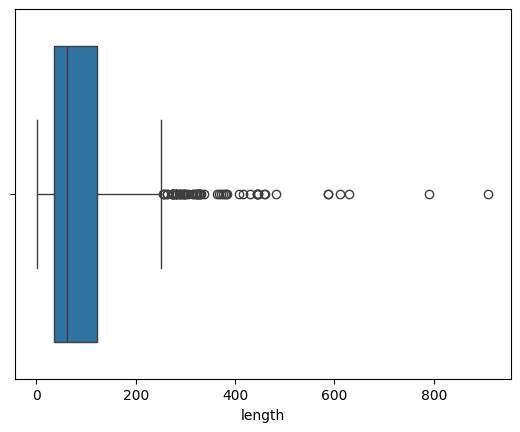

In [ ]:
# Distribution of text messages
sns.boxplot(data['length'], orient='h')
plt.show()

In [ ]:
# statistics of message length
data['length'].describe()

,length
count,5574.000000
mean,80.444923
std,59.841828
min,2.000000
25%,36.000000
50%,61.000000
75%,122.000000
max,910.000000


In [ ]:
# understanding the lengthy message
data[data['length'] == data['length'].max()]['text'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

In [ ]:
# understanding the shortest message
data[data['length'] == data['length'].min()]['text'].value_counts()

,count
text,
Ok,4
:),1


In [ ]:
# Creating a function to remove punctuations and stopwords form the message
def text_process(mess):
  # Getting all the words and from messages and removing punctuations
  no_punc = [letter for letter in mess if letter not in string.punctuation]
  # Joining all the words back
  out_mess = ''.join(no_punc)
  # Removing the stopword from the messages and returning it in list
  return [word for word in out_mess.split() if word.lower() not in stopwords.words('english')]

In [ ]:
# Let's look at the working of the function
print('Sample data before applying the function:\n', data['text'].head())
# THIS LINE OF CODE IS NOT MODIFYING THE RAW DATA
print('\nSample data after applying the function:\n', data['text'].head().apply(text_process))

Sample data before applying the function:
 0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
2    Free entry in 2 a wkly comp to win FA Cup fina...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
Name: text, dtype: object

Sample data after applying the function:
 0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: text, dtype: object


In [ ]:
# Spliting the data into X (Fratures) and y (Output)
X = data['text']
y = data['type']


# Train/Test split (80%/20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [ ]:
# Word Embedding

bow = CountVectorizer(analyzer=text_process)

X_train_bow = bow.fit_transform(X_train)
X_test_bow = bow.transform(X_test)

In [ ]:
tfidf = TfidfTransformer()

X_train_tfidf = tfidf.fit_transform(X_train_bow)
X_test_tfidf = tfidf.transform(X_test_bow)

In [ ]:
# ML Algorithm - Naive Bayes Classifier
nb_model = MultinomialNB(alpha=0.5)
nb_model.fit(X_train_tfidf, y_train)

MultinomialNB(alpha=0.5)

In [ ]:
# Prediction
y_pred = nb_model.predict(X_test_tfidf)
y_pred

array(['ham', 'ham', 'ham', ..., 'ham', 'ham', 'spam'], dtype='<U4')

              precision    recall  f1-score   support

         ham       0.97      1.00      0.99       966
        spam       0.99      0.82      0.90       149

    accuracy                           0.97      1115
   macro avg       0.98      0.91      0.94      1115
weighted avg       0.98      0.97      0.97      1115



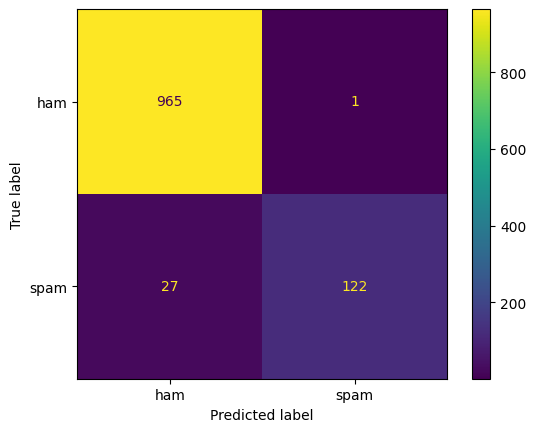

In [ ]:
# Metric comparision
cm = ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
print(classification_report(y_test, y_pred))

# **Final Project Conclusion**

This project focused on building a text-based spam detection system using classical **Natural Language Processing techniques** and a **Multinomial Naive Bayes classifier**. Due to a significant class imbalance in the dataset, spam messages only made up a small portion of the total samples. This meant that recall for the spam class was more important than overall accuracy as an evaluation goal.

The final model achieved strong overall accuracy while maintaining a reasonable balance between precision and recall for spam detection, demonstrating that Naive Bayes remains an effective baseline for text classification tasks when evaluated correctly.

Overall, this project demonstrates the effectiveness of classical NLP techniques for spam detection.